<a href="https://colab.research.google.com/github/Thinsheep/TrainingTrack/blob/main/Traffic_Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist # to get the access to this dataset
from keras.models import Sequential # to define model
from keras.layers import Dense # to provide layers connected together to have fully connected layer
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical # to working with multicass dataset, on hot encoding
from keras.layers import Flatten # extended for convolution neural network, plat image to 1 dimension
from keras.layers.convolutional import Conv2D # extended for convolution neural network
from keras.layers.convolutional import MaxPooling2D # extended for convolution neural network
from keras.models import Model # useful tools to define a model
from keras.layers import Dropout 
import random

In [ ]:
np.random.seed(0) # to get the same number each time we call

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # load mnist dataset

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0]) # 60000 images, 28x28 pixels

(60000, 28, 28)
(10000, 28, 28)
60000


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimension of the images are not 28x28"
# This is to check if the datasets imported correctly or not

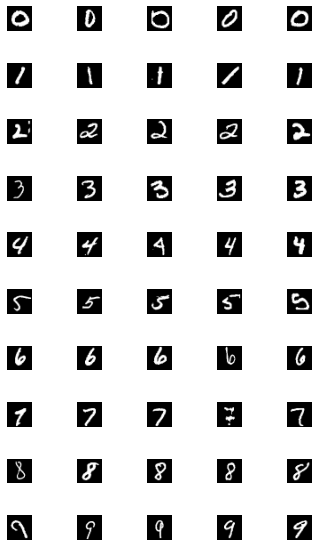

In [ ]:
num_of_samples = [] # recording images and category, each category contain 10 rows of images and 5 colums

cols = 5
num_classes =10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8)) # allow to display multiple plot in the same figure
#5 inches height and 10 inches width
fig.tight_layout() # dealing with overlappig layout
# now we loop through every colum and everrow
for i in range(cols):
  for j in range(num_classes):
      x_selected = X_train[y_train == j] # select the images in the training data
      axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)), :, :], cmap = plt.get_cmap("gray"))# get correct color 
      # first index 0, and last index len() of the array, :: make sure get entire image
      axs[j][i].axis("off")
      


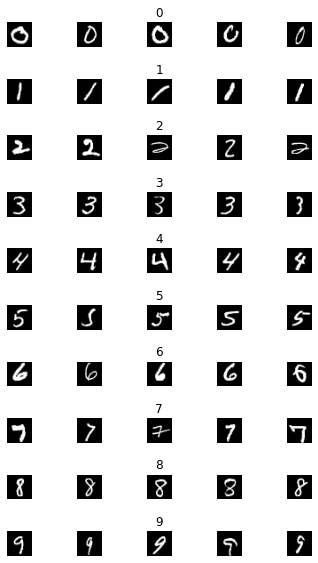

In [ ]:
num_of_samples = [] # recording images and category, each category contain 10 rows of images and 5 colums
cols = 5
num_classes =10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8)) # allow to display multiple 
#plot in the same figure
#5 inches height and 10 inches width
fig.tight_layout() # dealing with overlappig layout
# now we loop through every colum and everrow
for i in range(cols):
  for j in range(num_classes):
      x_selected = X_train[y_train == j] # select the images in the training data
      axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)), :, :], cmap = plt.get_cmap("gray"))
      # get correct color 
      # first index 0, and last index len() of the array, :: make sure get entire image
      axs[j][i].axis("off")
      if i ==2:
        axs[j][i].set_title(str(j)) # currently we show only 5 samples per class but accutally we have thousand
        num_of_samples.append(len(x_selected)) # record number of samples of each class appended into a sigle 
        #array, able to multiply

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


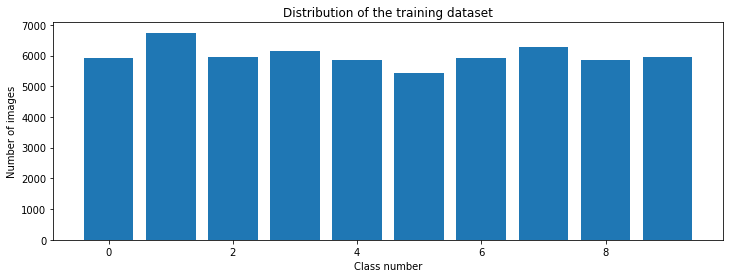

In [ ]:
print(num_of_samples) # amount of images belong to each class
plt.figure(figsize=(12, 4)) # just size of graph
plt.bar(range(0, num_classes), num_of_samples) # attributes for x and y axis
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train, 10) # 10 is the number of classes, make one hot encoding
y_test = to_categorical(y_test, 10)

In [ ]:
X_train = X_train/255 # normalizing the data
X_test = X_test/255 # 
# Well our training data for instance contains 60000 grayscale images each image containing pixel intensities from 0 to 255.
# We choose to divide by 255 because we want to normalize our data to be in a range between 0 and 1.
# Therefore by dividing by 255 This ensures that the maximum pixel value 255 is normalized down to the maximum value of 1.
# We need to ensure that our data has a low variance. This helps the neural network better deal with the input data and to
# learn more quickly and accurately. Since these functions use a base of e with exponents you can see that E to the exponent 1 
# is going to be a much smaller value than each of the exponent of 255.
# we got to prepare dataset before we can training them


In [ ]:
# define the letNet model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size= (2,2)))
  model.add(Conv2D(15, (3, 3), activation= 'relu'))# we use more dense input so we 
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation= 'relu')) # 500 nodes
  model.add(Dropout(0.5)) # 0.5 is the recommendation by researcher
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [ ]:
history = model.fit(X_train, y_train, epochs= 10, validation_split= 0.1, batch_size= 400, verbose=1, shuffle=1)

Epoch 1/10
135/135 [==============================] - 30s 225ms/step - loss: 0.2095 - accuracy: 0.9336 - val_loss: 0.0431 - val_accuracy: 0.9865
Epoch 2/10
135/135 [==============================] - 30s 224ms/step - loss: 0.0694 - accuracy: 0.9785 - val_loss: 0.0383 - val_accuracy: 0.9867
Epoch 3/10
135/135 [==============================] - 30s 224ms/step - loss: 0.0546 - accuracy: 0.9830 - val_loss: 0.0408 - val_accuracy: 0.9872
Epoch 4/10
135/135 [==============================] - 36s 265ms/step - loss: 0.0527 - accuracy: 0.9839 - val_loss: 0.0342 - val_accuracy: 0.9907
Epoch 5/10
135/135 [==============================] - 30s 222ms/step - loss: 0.0476 - accuracy: 0.9861 - val_loss: 0.0393 - val_accuracy: 0.9902
Epoch 6/10
135/135 [==============================] - 30s 223ms/step - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.0432 - val_accuracy: 0.9880
Epoch 7/10
135/135 [==============================] - 30s 223ms/step - loss: 0.0381 - accuracy: 0.9888 - val_loss: 0.0402 - val_ac

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch') # validation loss is lower than loss
# the more epoch we run the validation loss and the loss approach each other
# In this case model keep memorize the training set then fail to generalize itself.

NameError: ignored

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch') # validation loss is lower than loss
# the more epoch we run the validation loss and the loss approach each other
# In this case model keep memorize the training set then fail to generalize itself.

NameError: ignored

<Response [200]>


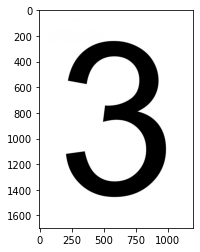

In [ ]:
import requests
from PIL import Image # PIL mean Python Imaging Library
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response = requests.get(url, stream=True)
print(response)
img =Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(1697, 1200, 3)


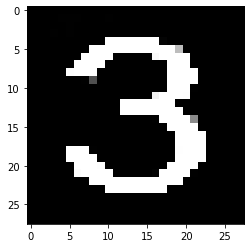

In [ ]:
import cv2 # openCV library computer vision library
img_array = np.asarray(img)
print(img_array.shape) # we need to reshape the image
resized = cv2.resize(img_array,(28,28)) # we resize because our network trained by 28x28 images
# it will be trouble to recognize the image at different size
#~print(resized)
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale) # to reverse black white image, 255 to 0 and reverse
plt.imshow(gray_scale, cmap = plt.get_cmap("gray"))
plt.imshow(image, cmap = plt.get_cmap("gray"))
# we have the back ground pixel 255: white, number is 0: in black but the traing image is opposite
# so we need to use cv2.bitwise_not

In [ ]:
image = image/255
image = image.reshape(1, 28, 28, 1)
print(image)

[[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.00392157]
   [0.00392157]
   [0.00392157]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.00392157]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.00392157]
   [

In [ ]:
#prediction = np.argmax(model.predict(image), axis=-1)
prediction = model.predict_classes(image)
print("predicted digit:", str(prediction))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted digit: [4]


In [ ]:
layer1 = Model(inputs=model.layers[0].input, outputs = model.layers[0].output) # 0 is to access 
# the first element. input into our very first layers (convol layers), first index of output layer
layer2 = Model(inputs=model.layers[0].input, outputs = model.layers[2].output)
# output from the second convolution layer (Third layer in the model)
visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


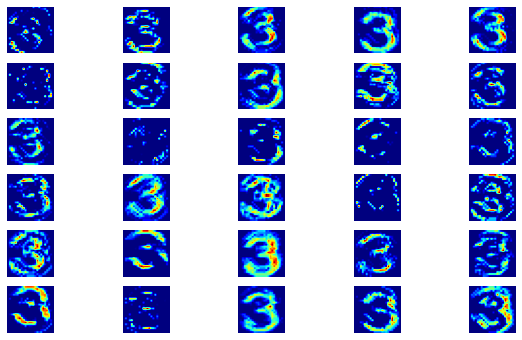

In [ ]:
plt.figure(figsize= (10,6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  # This will cycle through all over index values and place the AI + one image at this index position
  plt.imshow(visual_layer1[0,:, :, i], cmap=plt.get_cmap('jet'))
  # jet hightlight pixel values in the image.
  plt.axis('off')
  # feature extraction of 30 filter
  # read highet intensity, blue is lower intensity
  # each filter learn specific espect of the image, that make it so effective of image recognition.

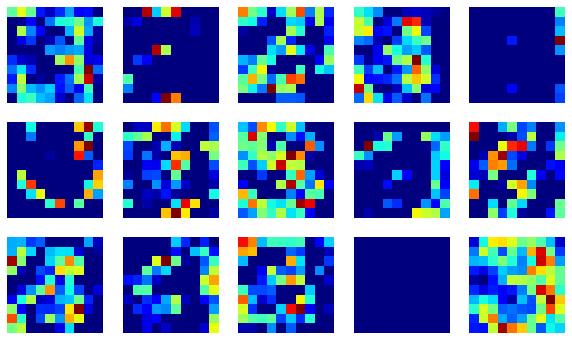

In [ ]:
plt.figure(figsize= (10,6))
for i in range(15):
  plt.subplot(3, 5, i+1)# 3x5 grid
  # This will cycle through all over index values and place the AI + one image at this index position
  plt.imshow(visual_layer2[0,:, :, i], cmap=plt.get_cmap('jet'))
  # jet hightlight pixel values in the image.
  plt.axis('off')
  # This is a bit more abstract, become unrecogniable at very end. Only retain information which
  # is relevant to it.